In [24]:
! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy 
! pip install --user --upgrade pixiedust
! pip install --user --upgrade bokeh
! pip install --user --upgrade PyWavelets
! pip install --user --upgrade statsmodels

Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: jupyter in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: sympy in /gpfs/global_fs01/s

In [25]:
from io import StringIO
from scipy import signal
from matplotlib import pylab as pl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pixiedust
from statsmodels.tsa.stattools import adfuller

In [26]:
# The code was removed by DSX for sharing.

,HH.MM.SS,20160201_NOPROC_HIGHLOAD_VSAMINSYNC_SIDR,20160502_ NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR,20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR,20160519_LOWLOAD_SIPROC_VSAMNOSYNC_SIDR,20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR
0,08.25.01,0.0250,0.025,0.007,0.009,0.009
1,08.25.02,0.0224,0.019,0.003,0.006,0.012
2,08.25.03,0.0201,0.023,0.006,0.007,0.011
3,08.25.04,0.0211,0.022,0.006,0.007,0.010
4,08.25.05,0.0334,0.016,0.005,0.009,0.011



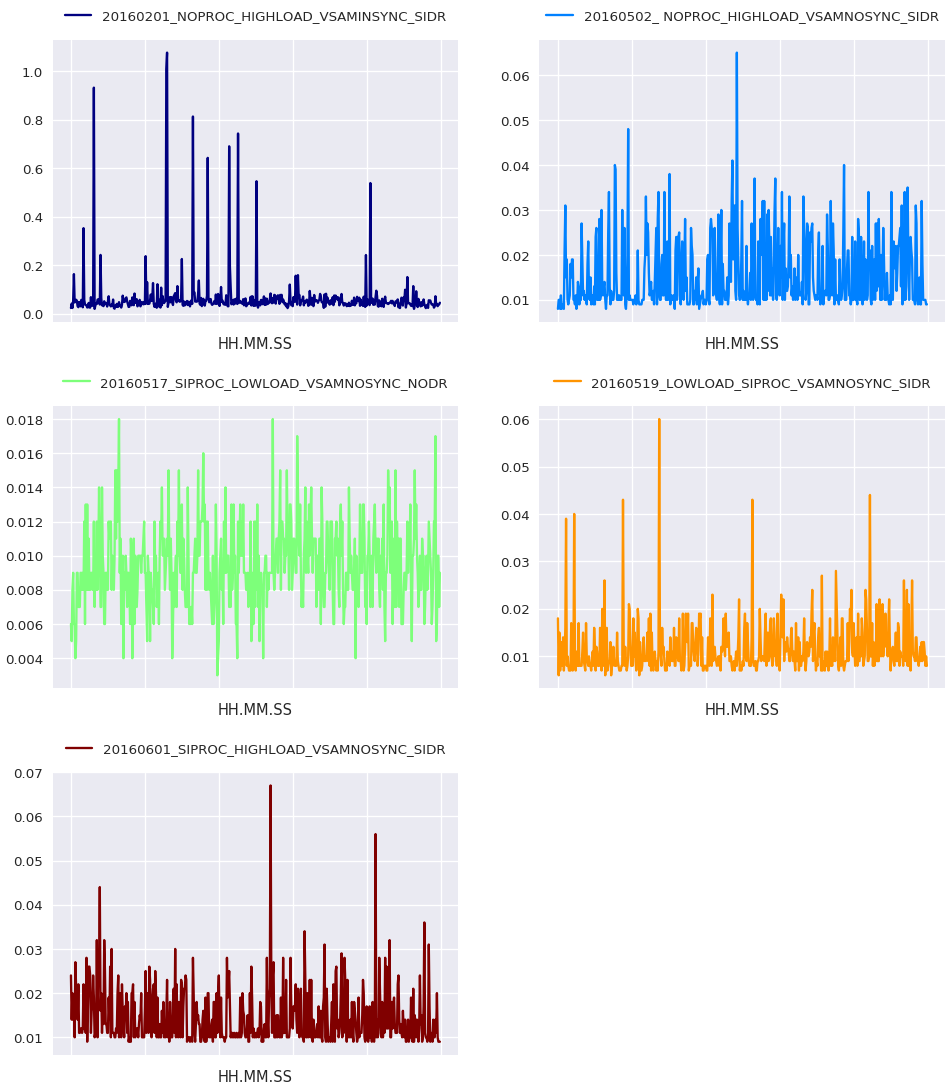

In [27]:
display(df_data_1)

In [28]:
conv_arr= df_data_1.values
Tempo = np.squeeze(np.asarray(np.delete(conv_arr,[1,2,3,4,5],axis=1)))
D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR = np.squeeze(np.asarray(np.delete(conv_arr,[0,2,3,4,5],axis=1)))
D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,3,4,5],axis=1)))
D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,2,4,5],axis=1)))
D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,2,3,5],axis=1)))
D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR = np.squeeze(np.asarray(np.delete(conv_arr,[0,1,2,3,4],axis=1)))

In [29]:
f, S20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR = signal.welch(D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, window ='blackman',fs=1.0,nperseg =2048,  scaling='spectrum') 
f1, S20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR = signal.welch(D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, window ='blackman',fs=1.0, nperseg =2048,  scaling='spectrum') 
f3, S20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR = signal.welch(D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, window ='blackman',fs=1.0,nperseg =2048,  scaling='spectrum') 
f4, S20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR = signal.welch(D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, window ='blackman',fs=1.0, nperseg =2048,  scaling='spectrum') 
f5, S20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR = signal.welch(D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, window ='blackman',fs=1.0, nperseg =2048,  scaling='spectrum') 

In [31]:
pd_spectre=pd.DataFrame(data={'20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR':np.squeeze(np.absolute(S20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR)), 
                              '20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR':np.squeeze(np.absolute(S20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR)),
                              '20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR':np.squeeze(np.absolute(S20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR)), 
                              '20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR':np.squeeze(np.absolute(S20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR)),
                              'Frequency [Hz]':f},dtype=float)
#pd_spectre.head()
display(pd_spectre)

In [8]:
#analisi di autocorrelazione

In [9]:
C20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR = np.correlate(S20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, S20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, mode='full')
C20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR = np.correlate(S20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, S20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, mode='full')
C20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR = np.correlate(S20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, S20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, mode='full')
C20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR = np.correlate(S20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, S20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, mode='full')
C20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR = np.correlate(S20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, S20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, mode='full')

pd_correlation=pd.DataFrame(data={'20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR':np.squeeze(np.absolute(C20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR)), 
                              '20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR':np.squeeze(np.absolute(C20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR)),
                              '20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR':np.squeeze(np.absolute(C20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR)), 
                              '20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR':np.squeeze(np.absolute(C20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR)),
                              '20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR':np.squeeze(np.absolute(C20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR)),
                              'Seconds':np.arange(1,C20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR.size+1,1)},dtype=float)

display(pd_correlation)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Signal stationariety test
# more ADF probability is negative more the signal is stationary
# we also insert 5%, 1% and 10% prob lavele as reference

In [11]:
result = adfuller(D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR)
print('20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR ADF Statistic: -41.192626
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [12]:
result = adfuller(D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR)
print('20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR ADF Statistic: -23.284174
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [13]:
result = adfuller(D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR)
print('20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR ADF Statistic: -12.973372
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [14]:
result = adfuller(D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR)
print('20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR ADF Statistic: -25.047520
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [15]:
result = adfuller(D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR)
print('20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR ADF Statistic: -25.085212
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


In [16]:
# Due to the stationariety of test i spli signal in 4 segment and i sum them to have a "combined signal"

In [17]:
timesec=np.arange(1,3224,1)
timesec1=np.arange(1,D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR.size,1)

In [18]:
ll=D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR.size/4
CS20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR =  D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR[0:ll] + D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR[ll:2*ll] + D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR[(2*ll):3*ll] + D20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR[3*ll:4*ll]
CS20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR =  D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR[0:ll] + D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR[ll:2*ll] + D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR[(2*ll):3*ll] + D20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR[3*ll:4*ll]
CS20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR =  D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR[0:ll] + D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR[ll:2*ll] + D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR[(2*ll):3*ll] + D20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR[3*ll:4*ll]
CS20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR =  D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR[0:ll] + D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR[ll:2*ll] + D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR[(2*ll):3*ll] + D20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR[3*ll:4*ll]
CS20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR =  D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR[0:ll] + D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR[ll:2*ll] + D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR[(2*ll):3*ll] + D20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR[3*ll:4*ll]
print(CS20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR.size)

3223


In [19]:
#Wavelet calculation and drawing

/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


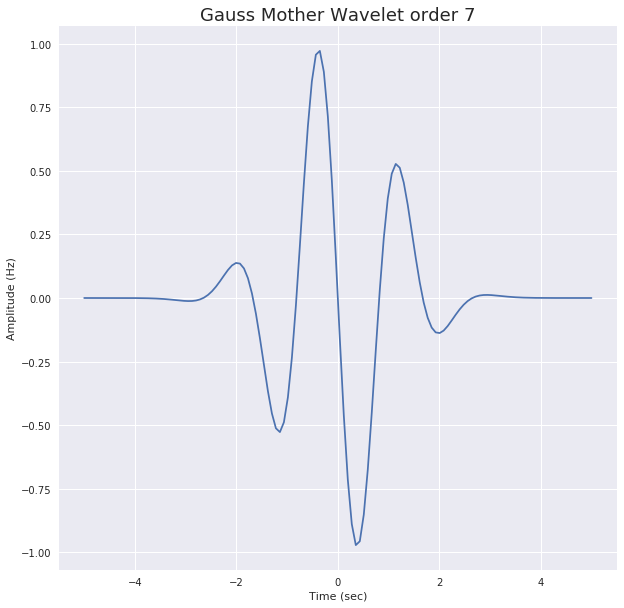

In [20]:
wavelet = pywt.ContinuousWavelet('gaus7')
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Hz)')
plt.title('Gauss Mother Wavelet order 7', fontsize=18)
psi, x = wavelet.wavefun(level=7)
plt.plot(x,psi)
plt.show()

In [21]:
WT20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, freqs = pywt.cwt(CS20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, timesec, 'gaus7')

In [22]:
plt.figure(figsize = (10,10))
#im = plt.imshow(W20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', vmax= 1.6, vmin=-1.6, interpolation ='bilinear', origin='lower')
im = plt.imshow(W20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet 20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR', fontsize=18)
plt.show() 

NameError: name 'W20160201_NOPROC_HIGHLOAD_VSAMSYNC_SIDR' is not defined

In [ ]:
W20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, freqs = pywt.cwt(CS20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, timesec, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(W20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet 20160502_NOPROC_HIGHLOAD_VSAMNOSYNC_SIDR', fontsize=18)
plt.show() 

In [ ]:
W20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, freqs = pywt.cwt(CS20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, timesec, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(W20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet 20160517_SIPROC_LOWLOAD_VSAMNOSYNC_NODR', fontsize=18)
plt.show() 

In [ ]:
W20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, freqs = pywt.cwt(CS20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, timesec, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(W20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet 20160519_SIPROC_LOWLOAD_VSAMNOSYNC_SIDR', fontsize=18)
plt.show() 

In [ ]:
W20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, freqs = pywt.cwt(CS20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, timesec, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(W20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet 20160601_SIPROC_HIGHLOAD_VSAMNOSYNC_SIDR', fontsize=18)
plt.show() 